In [1]:
from colorsys import hls_to_rgb

import jax as jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np
from jax.numpy import pi

import chromatix.functional as cx

In [2]:
# CC nadapez: from https://stackoverflow.com/a/20958684
# def colorize(field, normalize=True, gamma=0.3):
#     z = field.u[0,:,:,0,0]
def colorize(arr, normalize=True, gamma=0.3):
    z = arr
    r = np.abs(z)
    if normalize:
        r = r / np.max(r)

    arg = np.angle(z) 

    h = (arg + pi)  / (2 * pi) + 0.5
    l = 1.0 - 1.0/(1.0 + r**gamma)
    s = 0.8

    c = np.vectorize(hls_to_rgb) (h,l,s) # --> tuple
    c = np.array(c)  # -->  array of (3,n,m) shape, but need (n,m,3)
    c = c.swapaxes(0,2) 
    c = c.swapaxes(0,1) 
    return c

## Generate a 3D sample with a synthetic pollen



2024-05-26 18:05:59.226735: W external/xla/xla/service/gpu/nvptx_compiler.cc:760] The NVIDIA driver's CUDA version is 12.3 which is older than the ptxas CUDA version (12.5.40). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


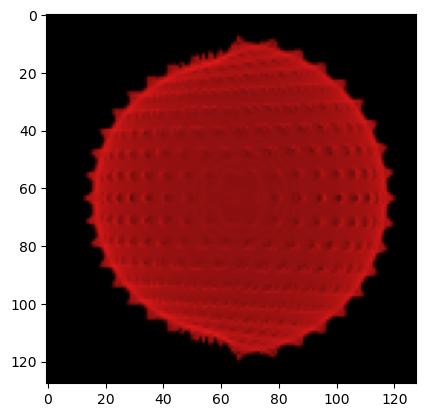

In [3]:
arr = cx.pollen_3d([128, 128, 128], filled = True)
arr_p = jnp.sum(arr, axis=1)
plt.imshow(colorize(arr_p))
# np.max(arr_p)


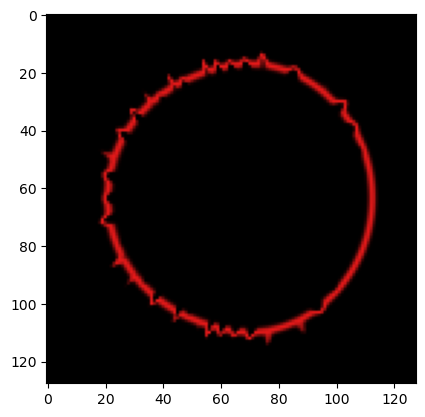

In [4]:
z = 84
plt.imshow(colorize(arr[:,z,:]))
